##Importation de la dataset Webis-TLDR-17

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from community import  community_louvain
from collections import defaultdict
import numpy as np

In [3]:
def load_webis_tldr_17():
    dataset = load_dataset("webis/tldr-17")
    return dataset
webis_tldr = load_webis_tldr_17()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1486: FutureWarning: The repository for webis/tldr-17 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/webis/tldr-17
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.war

Generating train split:   0%|          | 0/3848330 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/38 [00:00<?, ?it/s]

In [4]:
sample_size = 10000
df = pd.DataFrame(webis_tldr['train'].shuffle(seed=42).select(range(sample_size)))

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   author          10000 non-null  object
 1   body            10000 non-null  object
 2   normalizedBody  10000 non-null  object
 3   subreddit       10000 non-null  object
 4   subreddit_id    10000 non-null  object
 5   id              10000 non-null  object
 6   content         10000 non-null  object
 7   summary         10000 non-null  object
dtypes: object(8)
memory usage: 625.1+ KB


,author,body,normalizedBody,subreddit,subreddit_id,id,content,summary
0,HgUuGiGtIaEr,Watching Alexi Laiho from Children of Bodom pl...,Watching Alexi Laiho from Children of Bodom pl...,Guitar,t5_2qi79,cfvz1jv,Watching Alexi Laiho from Children of Bodom pl...,Wanted to emulate guitar player from a band I ...
1,st_gulik,Long Story Short: I'm starting a new campaign ...,Long Story Short: I'm starting a new campaign ...,rpg,t5_2qh2s,c098n8x,Long Story Short: I'm starting a new campaign ...,Can you help me think of a new kick ass settin...
2,ErusSenex,"Commenting here for visibility, unrelated to D...","Commenting here for visibility, unrelated to D...",GameDeals,t5_2qwx3,ca7ua25,"Commenting here for visibility, unrelated to D...","Grid 2 is fun, but driving physics don't feel ..."
3,booshyschmoozy,"Currently on my 2nd read of all the books, and...","Currently on my 2nd read of all the books, and...",asoiaf,t5_2r2o9,t3_2mxaev,"Currently on my 2nd read of all the books, and...",Tywin wrote to Pycell during Robert's Rebellio...
4,[deleted],"He's now a ""consultant"" for Ambit energy. Simp...","He's now a ""consultant"" for Ambit energy. Simp...",AskReddit,t5_2qh1i,t3_hjhp8,"He's now a ""consultant"" for Ambit energy. Simp...",My dad is investing time and money into a scam...


##Visualisation de la dataset

**Plot des meilleurs 10 auteurs et subreddits**

<ipython-input-6-639c1c24d227>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_counts.index, y=author_counts.values, palette='viridis')


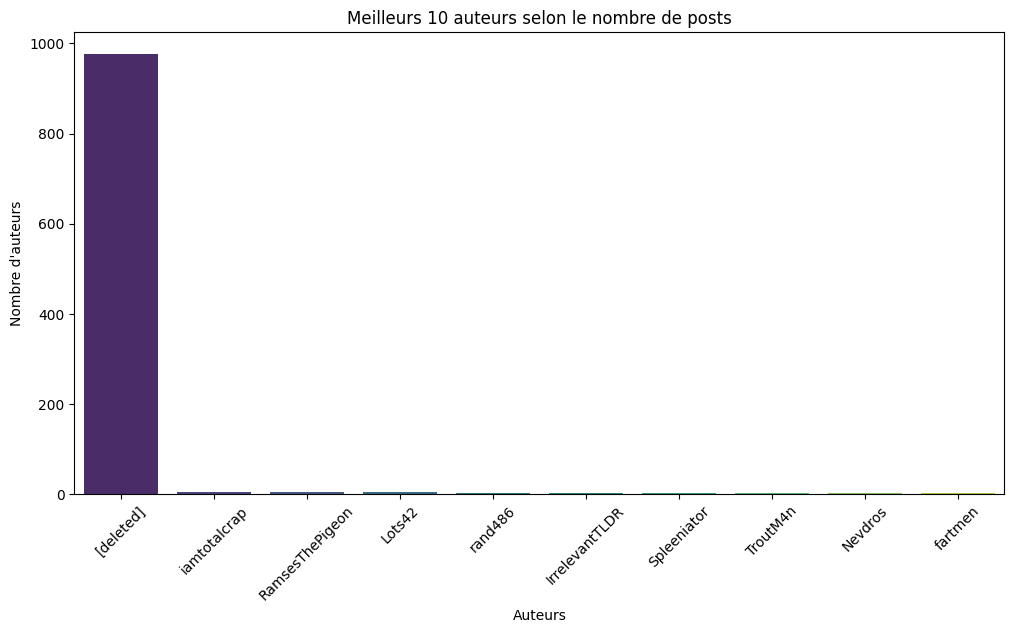

<ipython-input-6-639c1c24d227>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subreddit_counts.index, y=subreddit_counts.values, palette='viridis')


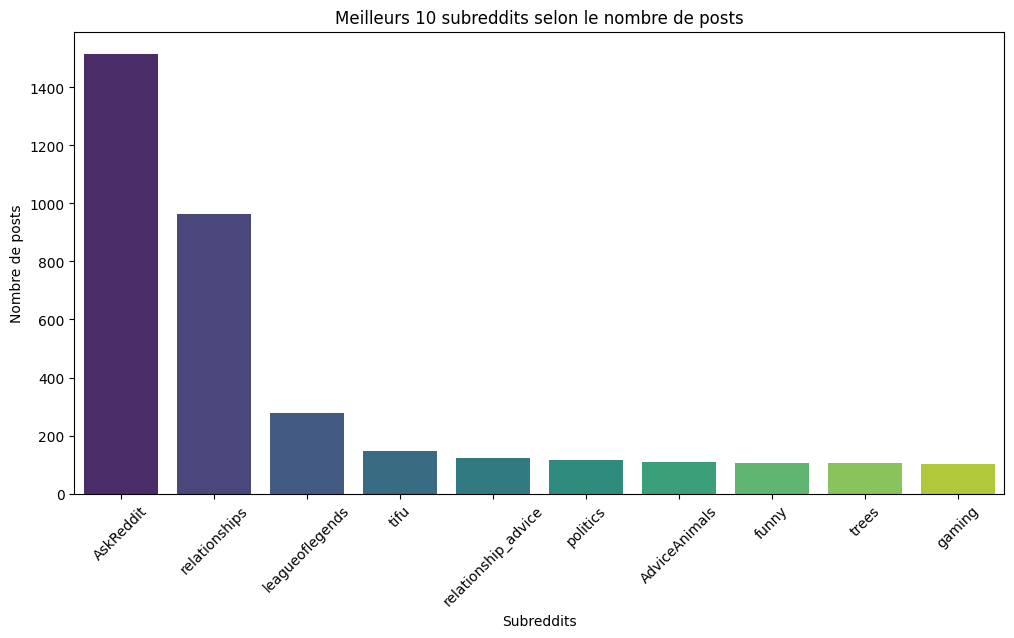

In [6]:
# Meilleurs 10 auteurs
author_counts = df['author'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=author_counts.index, y=author_counts.values, palette='viridis')
plt.title('Meilleurs 10 auteurs selon le nombre de posts')
plt.xticks(rotation=45)
plt.ylabel('Nombre d\'auteurs')
plt.xlabel('Auteurs')
plt.show()

# Meilleurs 10 subreddits
subreddit_counts = df['subreddit'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=subreddit_counts.index, y=subreddit_counts.values, palette='viridis')
plt.title('Meilleurs 10 subreddits selon le nombre de posts')
plt.xticks(rotation=45)
plt.ylabel('Nombre de posts')
plt.xlabel('Subreddits')
plt.show()

**Plot des 10 meilleurs auteurs après supression de l'auteur 'deleted'**

<ipython-input-7-64102dfdd63e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_counts.index, y=author_counts.values, palette='viridis')


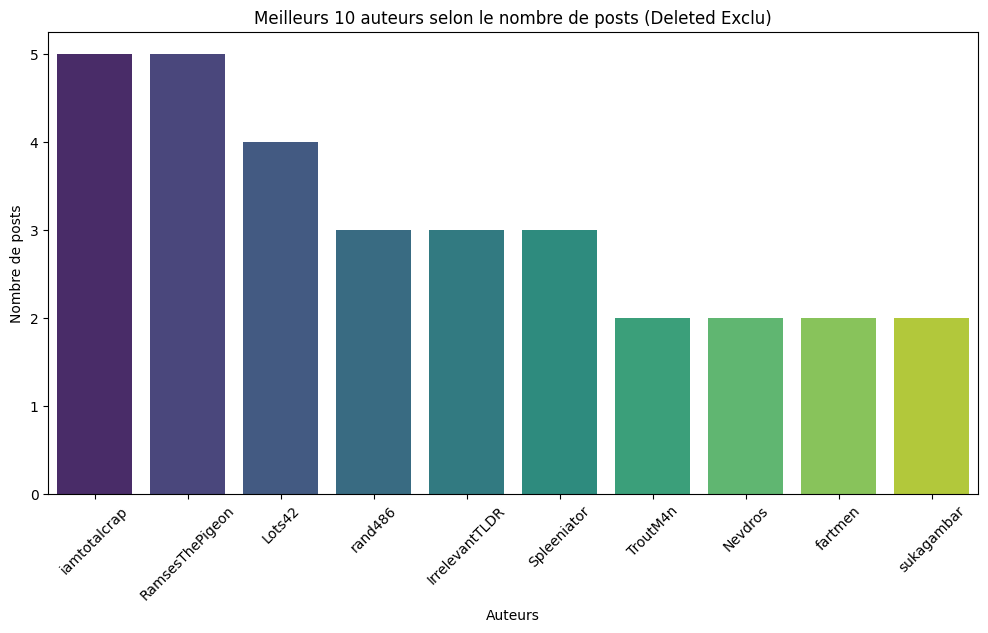

In [7]:
df_filtered = df[df['author'] != '[deleted]']
author_counts = df_filtered['author'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=author_counts.index, y=author_counts.values, palette='viridis')
plt.title('Meilleurs 10 auteurs selon le nombre de posts (Deleted Exclu)')
plt.xticks(rotation=45)
plt.ylabel('Nombre de posts')
plt.xlabel('Auteurs')
plt.show()

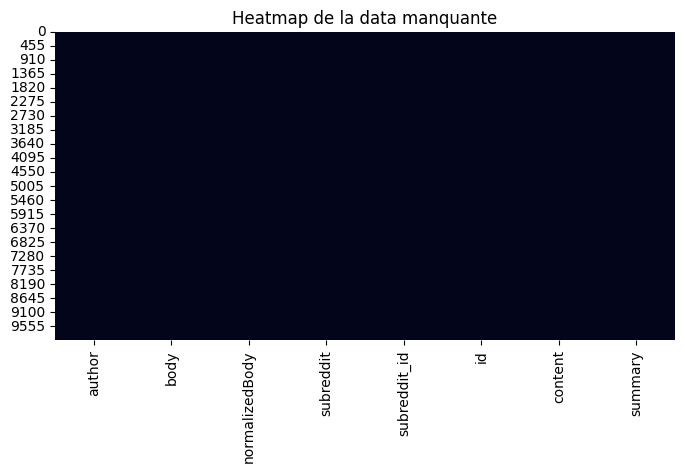

Valeurs manquantes dans chaque colonne:
 author            0
body              0
normalizedBody    0
subreddit         0
subreddit_id      0
id                0
content           0
summary           0
dtype: int64


In [8]:
missing = df.isnull().sum() / len(df) * 100
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap de la data manquante')
plt.show()
missing_values = df.isnull().sum()
print("Valeurs manquantes dans chaque colonne:\n", missing_values)

In [9]:
sample_size=500
sample = webis_tldr['train'].shuffle(seed=42).select(range(sample_size))

##Génération des graphes

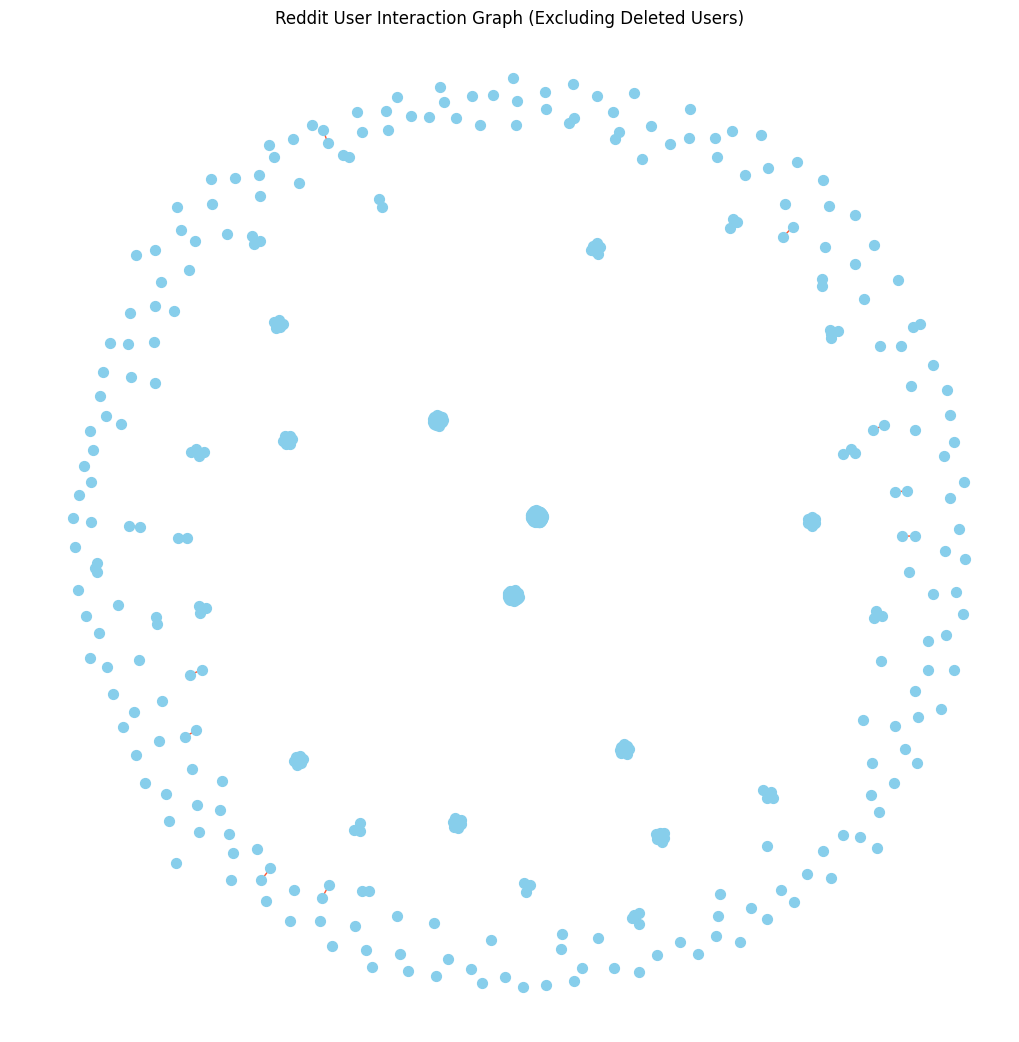

In [10]:
sample_size = 500
df_full = pd.DataFrame(webis_tldr['train'].shuffle(seed=42).select(range(sample_size)))

def build_graph(data):
    G = nx.Graph()
    subreddit_users = defaultdict(set)
    for index, item in data.iterrows():
        user = item['author']
        subreddit = item['subreddit']
        if user == '[deleted]':#Dépasser l'auteur deleted
            continue
        subreddit_users[subreddit].add(user)
        if user not in G:
            G.add_node(user, subreddits=set())
        G.nodes[user]['subreddits'].add(subreddit)
    # Créer un lien entre les utilisateurs qui participent dans le meme subreddit
    for subreddit, users in subreddit_users.items():
        users = list(users)
        for i in range(len(users)):
            for j in range(i + 1, len(users)):
                G.add_edge(users[i], users[j])
    return G
G = build_graph(df_full)

# Visualiser le graphe
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
nx.draw(G, node_color='skyblue', edge_color='#FF5733', node_size=50)
plt.title('Reddit User Interaction Graph (Excluding Deleted Users)')
plt.show()

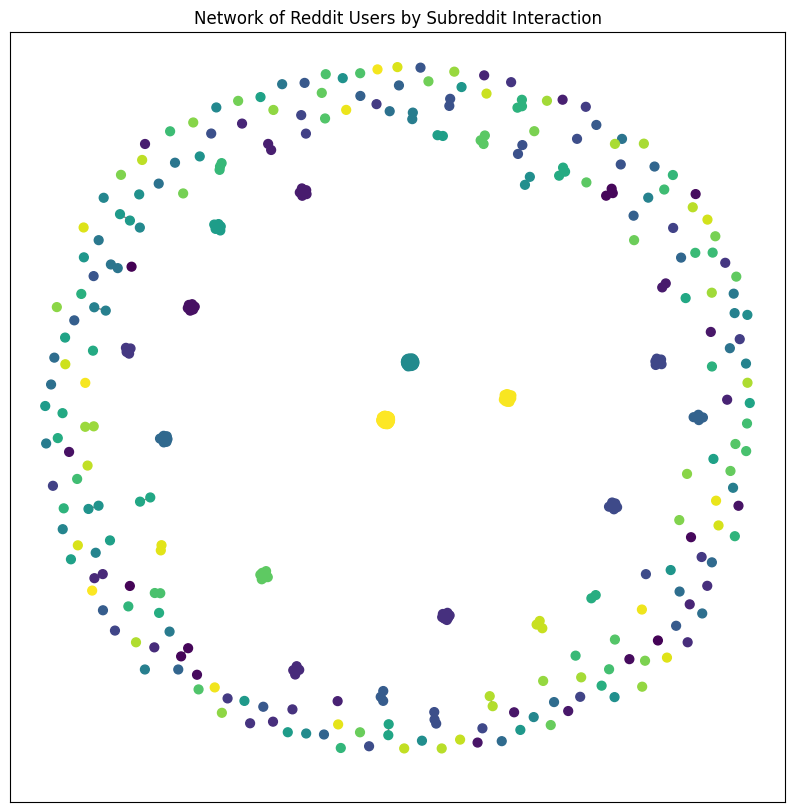

In [11]:
def detect_and_visualize_communities(G):
    # Application de la méthode Louvain pour la détection des communautés
    partition = community_louvain.best_partition(G)
    pos = nx.spring_layout(G)
    cmap = plt.get_cmap('viridis')
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(G, pos, node_color=list(partition.values()), node_size=40, cmap=cmap)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.title('Network of Reddit Users by Subreddit Interaction')
    plt.show()
    return partition
partition = detect_and_visualize_communities(G)

**Mapper les utilisateurs a leurs communautés**

In [12]:
community_dict = {}
for node, community in partition.items():
    if community not in community_dict:
        community_dict[community] = []
    community_dict[community].append(node)
print(community_dict)

{0: ['HgUuGiGtIaEr'], 1: ['st_gulik'], 2: ['ErusSenex'], 147: ['booshyschmoozy', 'BoltonSauce', 'Dancecomander'], 229: ['RuthlessRuben', 'shinytoyguns617', 'throwaway438712sdfjh', 'likeafuckingninja', 'f14tomcat', 'brohio11', 'Wooden_hampster', 'Babboon7', 'HunterIrked', 'ilynia', 'Loopbot75', 'COFFEE_IS_4_CLOSERS', 'TacoTweets', 'redlaWw', 'BasicUserAccount42', 'Skeetronic', 'PugLuv', 'Coriluvstosmile', 'Cosmok14', 'Chriswalken12398', 'sonac36', 'HairyAsHull', 'Pum_Pum', 'MrsJetson', 'steelrain', 'oyveyski', 'arquebus_x', 'rileyk', 'ohpizzaphaggot', 'MakesBadChoices', 'ComputerGeek01', 'OniNoMaggie', 'jaybill', 'musicalpets', 'SirPlus', 'nightstrike', 'Id10t3qu3', 'sexdrugsandponies', 'bippyz', 'needmoarbass', 'brazendynamic', '100octane', 'hampig', 'AwesomeTableLegs', 'AthlonRob', 'Pyrom4n', 'SingingDownTheDrain', 'Themaskedotaku', 'donpedrodela', 'BoonTobias', 'EnigmaGuy', 'sci901', 'StosifJalin', 'maxmbacon', 'imighthaveachode', 'subliminal_messaging', 'SlurpaDurr', 'DrPeavey', 'un

**Extraire les sujets des communautés**

In [13]:
def extract_community_topics(G, community_dict):
    community_topics = {}
    for community, nodes in community_dict.items():
        topic_counter = {}
        for node in nodes:
            subreddits = G.nodes[node].get('subreddits', [])
            for subreddit in subreddits:
                if subreddit in topic_counter:
                    topic_counter[subreddit] += 1
                else:
                    topic_counter[subreddit] = 1
        sorted_topics = sorted(topic_counter.items(), key=lambda item: item[1], reverse=True)
        community_topics[community] = sorted_topics[:5]
    return community_topics
community_topics = extract_community_topics(G, community_dict)
print(community_topics)

{0: [('Guitar', 1)], 1: [('rpg', 1)], 2: [('GameDeals', 1)], 147: [('asoiaf', 3)], 229: [('AskReddit', 81)], 5: [('Anxiety', 1)], 6: [('askseddit', 1)], 7: [('PS4', 1)], 8: [('lgbt', 1)], 9: [('atheism', 6)], 210: [('TalesFromTheFrontDesk', 3)], 11: [('BDSMcommunity', 1)], 13: [('battlestations', 1)], 27: [('depression', 4)], 15: [('LifeProTips', 1)], 4: [('electronic_cigarette', 3)], 17: [('explainlikeimfive', 6)], 57: [('MensRights', 2)], 77: [('WTF', 7)], 109: [('relationships', 35)], 170: [('relationship_advice', 3)], 26: [('askscience', 2)], 28: [('Bass', 1)], 31: [('SubredditDrama', 1)], 33: [('headphones', 1)], 34: [('GrandTheftAutoV', 1)], 35: [('COPYRIGHT', 1)], 36: [('gamecollecting', 1)], 39: [('MDMA', 1)], 40: [('seduction', 1)], 41: [('Mariners', 1)], 3: [('GlobalOffensive', 2)], 43: [('swtor', 1)], 44: [('Random_Acts_Of_Amazon', 1)], 51: [('funny', 6)], 48: [('mtgcube', 1)], 49: [('technology', 6)], 113: [('movies', 2)], 53: [('shittyaskscience', 1)], 54: [('weightroom', 

##AgglomerativeClustering avec et sans utilisation de PCA

In [60]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

Silhouette Score sans PCA: 0.20248892188796672
Calinski-Harabasz Score sans PCA: 3.8825331010077466


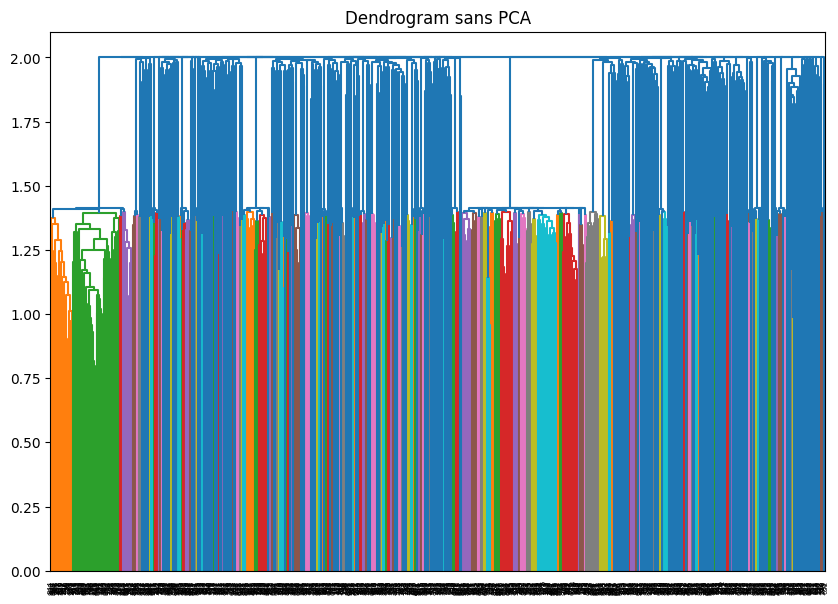

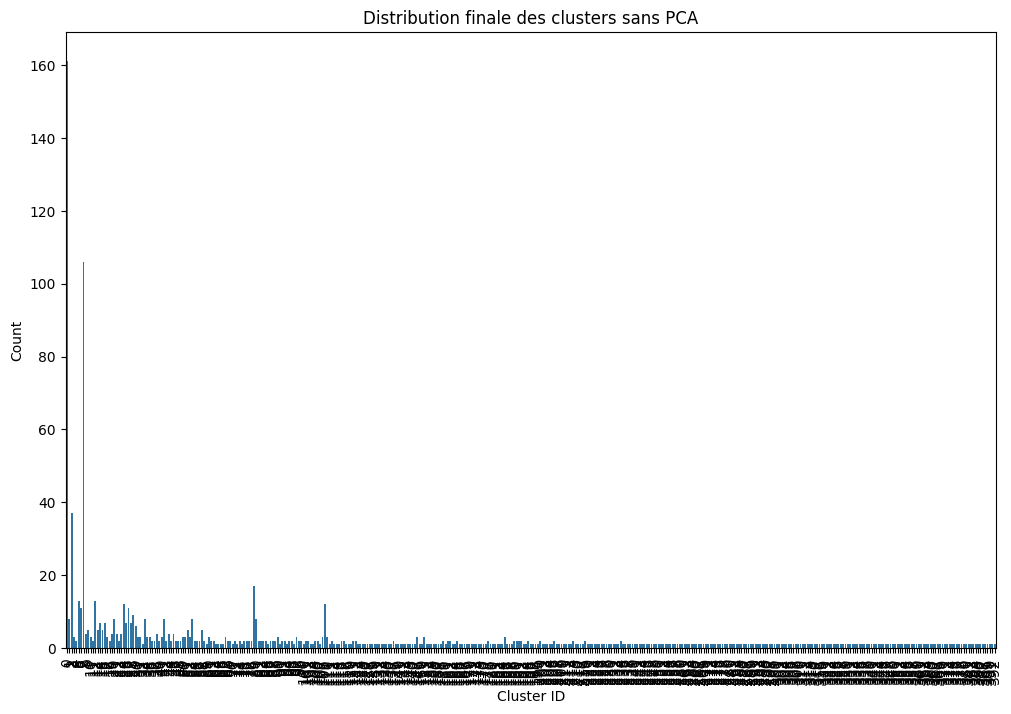

In [66]:
f = pd.DataFrame(webis_tldr['train'].shuffle(seed=42).select(range(1000)))

# Configuration TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1500, min_df=10, max_df=0.5)
tfidf_features = tfidf_vectorizer.fit_transform(df['body']).toarray()

# One-Hot Encoding pour les caractéristiques catégorielles
encoder = OneHotEncoder(handle_unknown='ignore')
categorical_features = encoder.fit_transform(df[['subreddit']]).toarray()

# Combiner les caractéristiques sans pca
features = np.hstack((tfidf_features, categorical_features))

# AHC
ahc = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5, linkage='complete', compute_full_tree=True)
df['cluster'] = ahc.fit_predict(features)  # Use raw combined features

# Evaluation
silhouette_avg = silhouette_score(features, df['cluster'])
calinski_harabasz_avg = calinski_harabasz_score(features, df['cluster'])
print("Silhouette Score sans PCA:", silhouette_avg)
print("Calinski-Harabasz Score sans PCA:", calinski_harabasz_avg)

# Dendrogram for visualization without PCA
plt.figure(figsize=(10, 7))
plt.title("Dendrogram sans PCA")
dendrogram(linkage(features, method='complete'))
plt.show()

# Distribution des clusters sans PCA
plt.figure(figsize=(12, 8))
sns.countplot(x='cluster', data=df)
plt.title('Distribution finale des clusters sans PCA')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Silhouette Score avec PCA: 0.5407548229244756
Calinski-Harabasz Score avec PCA: 108.67573149293867


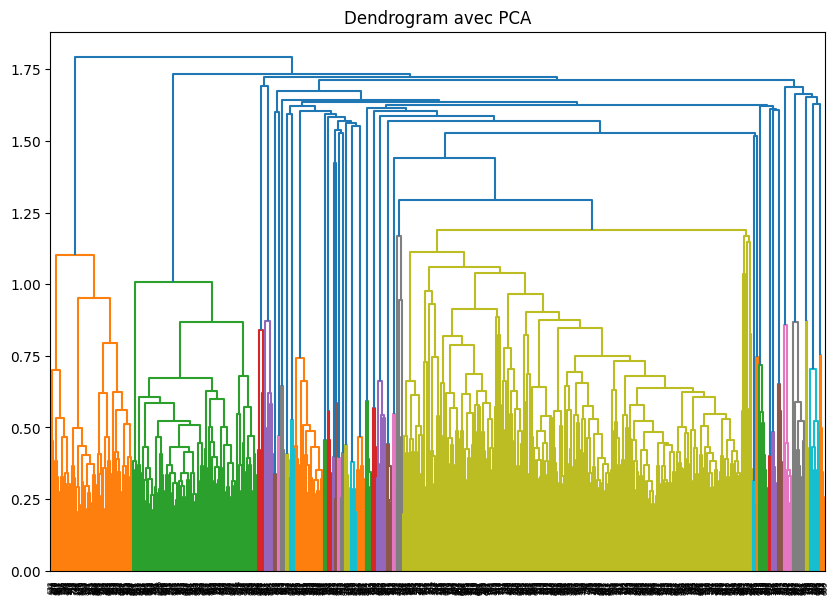

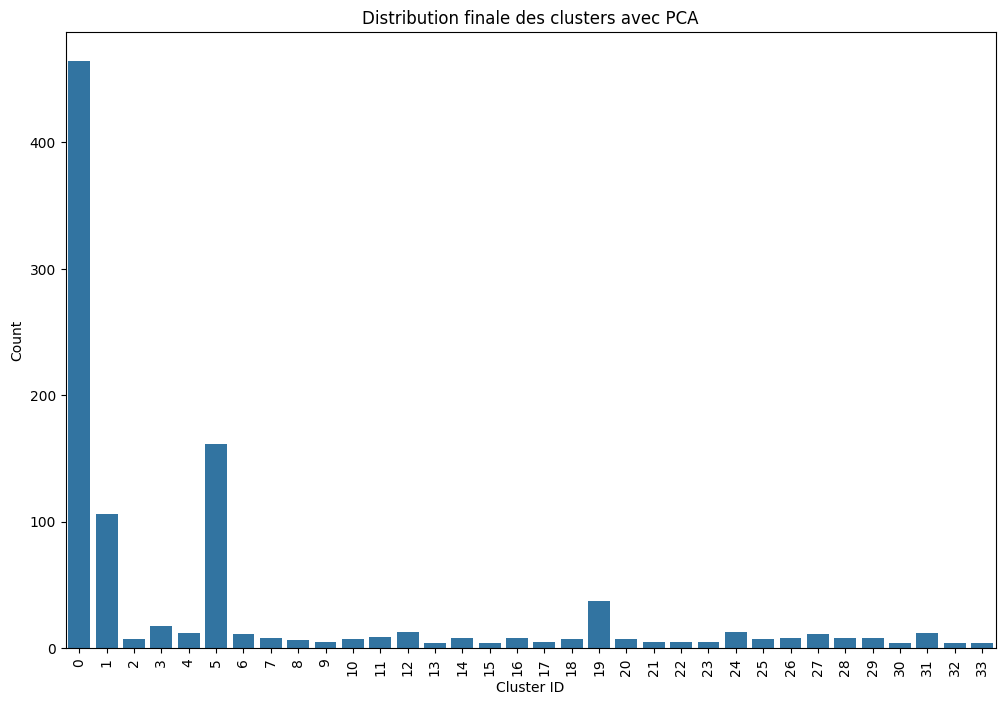

In [67]:
df = pd.DataFrame(webis_tldr['train'].shuffle(seed=42).select(range(1000)))

# Configuration TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1500, min_df=10, max_df=0.5)
tfidf_features = tfidf_vectorizer.fit_transform(df['body']).toarray()

# One-Hot Encoding pour les caractéristiques catégorielles
encoder = OneHotEncoder(handle_unknown='ignore')
categorical_features = encoder.fit_transform(df[['subreddit']]).toarray()

# Combiner les caractéristiques
features = np.hstack((tfidf_features, categorical_features))

# PCA
pca = PCA(n_components=50)
reduced_features = pca.fit_transform(features)

# ACH
ahc = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5, linkage='complete', compute_full_tree=True)
df['cluster'] = ahc.fit_predict(reduced_features)

# Evaluation
silhouette_avg = silhouette_score(reduced_features, df['cluster'])
calinski_harabasz_avg = calinski_harabasz_score(reduced_features, df['cluster'])
print("Silhouette Score avec PCA:", silhouette_avg)
print("Calinski-Harabasz Score avec PCA:", calinski_harabasz_avg)

# Dendrogram for visualization
plt.figure(figsize=(10, 7))
plt.title("Dendrogram avec PCA")
dendrogram(linkage(reduced_features, method='complete'))
plt.show()

# Visualization of the final cluster distribution
plt.figure(figsize=(12, 8))
sns.countplot(x='cluster', data=df)
plt.title('Distribution finale des clusters avec PCA')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()